In [ ]:
#kalmanfilterindps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
n_iters = 50

In [ ]:

actual_x = 0
actual_y = 0


Q = np.full((2,2), 0.0001)
print('Q matrix: ', Q.shape, '\n\n', Q)

Q matrix:  (2, 2) 

 [[0.0001 0.0001]
 [0.0001 0.0001]]


In [ ]:

x_pos = np.random.normal(0, 0.5, n_iters)
y_pos = np.random.normal(0, 0.5, n_iters)

measurements = np.stack((x_pos, y_pos), axis=1).reshape((n_iters,2,1))

print('Measurements: ', measurements.shape, '\n\n', measurements[0:5], '\n', '...')

Measurements:  (50, 2, 1) 

 [[[ 0.27740274]
  [-0.06279206]]

 [[-0.2152747 ]
  [ 0.63636472]]

 [[ 0.80285685]
  [-0.06330235]]

 [[-0.20640604]
  [ 0.38746918]]

 [[-0.49201496]
  [ 0.71666896]]] 
 ...


In [ ]:

R = np.diag([0.25, 0.25])
print('R matrix: ', R.shape, '\n\n', R)

R matrix:  (2, 2) 

 [[0.25 0.  ]
 [0.   0.25]]


In [ ]:

x_hat = np.zeros((n_iters, 2,1))
P = np.zeros((n_iters,2,2))
x_hat_min = np.zeros((n_iters, 2,1))
P_min = np.zeros((n_iters,2,2))
K = np.zeros((n_iters,2,2))

In [ ]:

x_hat[0] = [[0],[0]]

P[0] = np.diag([1000.0, 1000.0])

print('x_hat[0]:\n\n', x_hat[0], '\n\n P[0] matrix: ', P[0].shape, '\n\n', P[0])

x_hat[0]:

 [[0.]
 [0.]] 

 P[0] matrix:  (2, 2) 

 [[1000.    0.]
 [   0. 1000.]]


In [ ]:

A = np.array([[1.0, 0.0],
               [0.0, 1.0]])


H = np.eye(2)


I = np.eye(2)

print('A matrix \n\n', A, '\n\n H matrix \n\n', H, '\n\n I matrix \n\n', I)

A matrix 

 [[1. 0.]
 [0. 1.]] 

 H matrix 

 [[1. 0.]
 [0. 1.]] 

 I matrix 

 [[1. 0.]
 [0. 1.]]


In [ ]:

import numpy as np

from numpy.linalg import inv

n_iters = 50

actual_x = 0
actual_y = 0


Q = np.full((2,2), 0.0001)
print('Q matrix: ', Q.shape, '\n\n', Q)
x_pos = np.random.normal(0, 0.5, n_iters)
y_pos = np.random.normal(0, 0.5, n_iters)
measurements = np.stack((x_pos, y_pos), axis=1).reshape((n_iters,2,1))
print('Measurements: ', measurements.shape, '\n\n', measurements[0:5], '\n', '...')

R = np.diag([0.25, 0.25])
print('R matrix: ', R.shape, '\n\n', R)

x_hat = np.zeros((n_iters, 2,1))
P = np.zeros((n_iters,2,2))
x_hat_min = np.zeros((n_iters, 2,1))
P_min = np.zeros((n_iters,2,2))
K = np.zeros((n_iters,2,2))

x_hat[0] = [[0],[0]]
P[0] = np.diag([1000.0, 1000.0])
print('x_hat[0]:\n\n', x_hat[0], '\n\n P[0] matrix: ', P[0].shape, '\n\n', P[0])
A = np.array([[1.0, 0.0],
               [0.0, 1.0]])

H = np.eye(2)

I = np.eye(2)

print('A matrix \n\n', A, '\n\n H matrix \n\n', H, '\n\n I matrix \n\n', I)
for k in range(1, n_iters):

    x_hat_min[k] = A.dot(x_hat[k-1])
    P_min[k] = A.dot(P[k-1]).dot(A.T) + Q

    S = H.dot(P_min[k]).dot(H.T) + R

    K[k] = P_min[k].dot(H.T).dot(inv(S))


    x_hat[k] = x_hat_min[k] + K[k].dot(measurements[k] - H.dot(x_hat_min[k]))
    P[k] = (I - K[k]).dot(P_min[k])

Q matrix:  (2, 2) 

 [[0.0001 0.0001]
 [0.0001 0.0001]]
Measurements:  (50, 2, 1) 

 [[[-0.18869418]
  [-0.44457447]]

 [[-0.18638757]
  [-1.11096631]]

 [[ 0.18165295]
  [-0.0692259 ]]

 [[ 0.09132923]
  [-0.70994194]]

 [[-0.81854953]
  [-0.16498964]]] 
 ...
R matrix:  (2, 2) 

 [[0.25 0.  ]
 [0.   0.25]]
x_hat[0]:

 [[0.]
 [0.]] 

 P[0] matrix:  (2, 2) 

 [[1000.    0.]
 [   0. 1000.]]
A matrix 

 [[1. 0.]
 [0. 1.]] 

 H matrix 

 [[1. 0.]
 [0. 1.]] 

 I matrix 

 [[1. 0.]
 [0. 1.]]


<ipython-input-18-d965659ee76b>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.scatter(float(measurements[n][0]), float(measurements[n][1]),
<ipython-input-18-d965659ee76b>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.scatter(float(x_hat[n][0]), float(x_hat[n][1]),


Text(0, 0.5, 'Y axis')

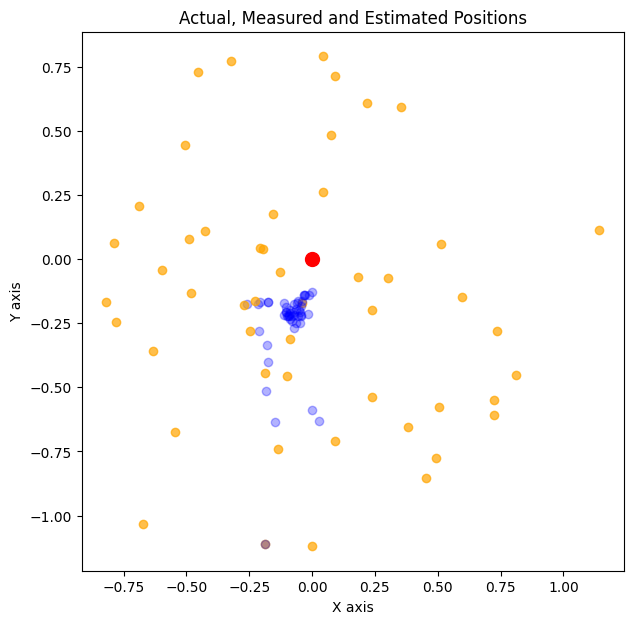

In [ ]:
plt.figure(figsize=(7,7))
for n in range(n_iters):
    plt.scatter(float(measurements[n][0]), float(measurements[n][1]),
                color='orange', label='measured position', alpha=0.7)
    plt.scatter(float(x_hat[n][0]), float(x_hat[n][1]),
                color='blue', label='kalman position', alpha=0.3)

plt.scatter(actual_x, actual_y, color='red', s=100, label='actual position')
plt.title('Actual, Measured and Estimated Positions')
plt.xlabel('X axis')
plt.ylabel('Y axis')

Text(0, 0.5, 'Y Position')

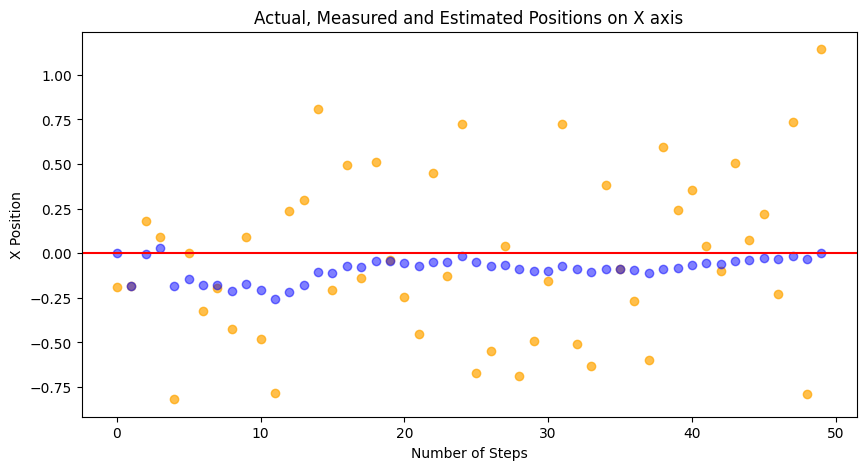

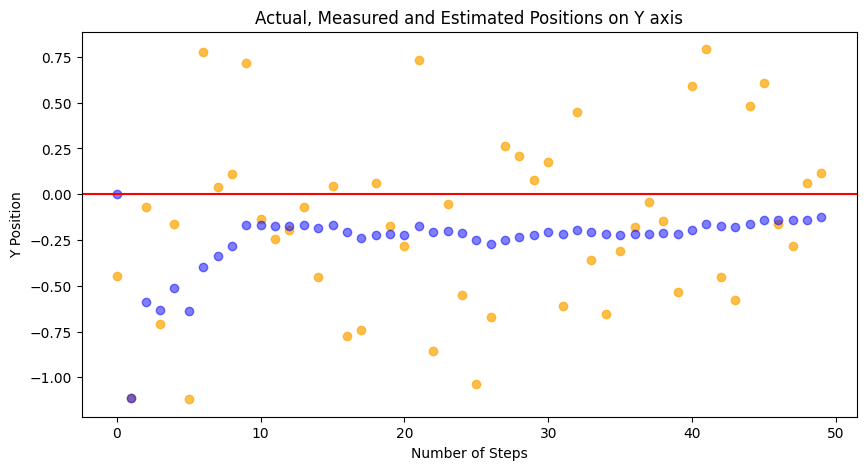

In [ ]:
plt.figure(figsize=(10,5))
for n in range(n_iters):
    plt.scatter(x = n, y = measurements[n][0], label='measurements', color='orange', alpha=0.7)
    plt.scatter(x = n, y = x_hat[n][0], label='estimate after kalman', color='blue', alpha=0.5)
plt.axhline(actual_x, color='r', label='actual x position')
plt.title('Actual, Measured and Estimated Positions on X axis')
plt.xlabel('Number of Steps')
plt.ylabel('X Position')

plt.figure(figsize=(10,5))
for n in range(n_iters):
    plt.scatter(x = n, y = measurements[n][1], label='measurements', color='orange', alpha=0.7)
    plt.scatter(x = n, y = x_hat[n][1], label='estimate after kalman', color='blue', alpha=0.5)
plt.axhline(actual_x, color='r', label='actual x position')
plt.title('Actual, Measured and Estimated Positions on Y axis')
plt.xlabel('Number of Steps')
plt.ylabel('Y Position')

In [ ]:

x_position = []
y_position = []
data_type = []
n_steps = []

for n in range(n_iters):
    x_position.append(float(measurements[n][0]))
    y_position.append(float(measurements[n][1]))
    data_type.append('measured')
    n_steps.append(int(n))

for n in range(n_iters):
    x_position.append(float(x_hat[n][0]))
    y_position.append(float(x_hat[n][1]))
    data_type.append('estimated')
    n_steps.append(int(n))

df = pd.DataFrame({'x_position':x_position,
                   'y_position':y_position,
                   'data_type':data_type,
                   'n_steps':n_steps})


import plotly.express as px

fig = px.scatter(df,
                 x ="x_position",
                 y ="x_position",
                 animation_frame ="n_steps",
                 animation_group ="data_type",
                 color ="data_type",
                 facet_col ="data_type",
                 range_x=[-3, 3],
                 range_y=[-3, 3])
fig.show()

<ipython-input-23-823f7c568256>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_position.append(float(measurements[n][0]))
<ipython-input-23-823f7c568256>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_position.append(float(measurements[n][1]))
<ipython-input-23-823f7c568256>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_position.append(float(x_hat[n][0]))
<ipython-input-23-823f7c568256>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a